In [24]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.ar_model import AutoReg
import math
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv ('AAL (Mar 2018 to May 2020).csv')

In [3]:
df.head()

,Date,Adj Close
0,22/3/2018,51.08
1,23/3/2018,49.81
2,26/3/2018,50.64
3,27/3/2018,49.71
4,28/3/2018,49.66


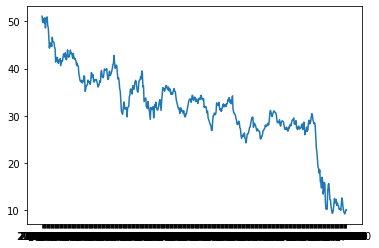

In [11]:
plt.plot (df['Date'], df['Adj Close'])
plt.show()

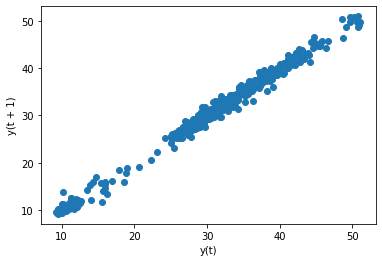

In [6]:
# Quick check for auto-correlation
lag_plot(df['Adj Close'])
plt.show()
# The auto-correlation is very strong

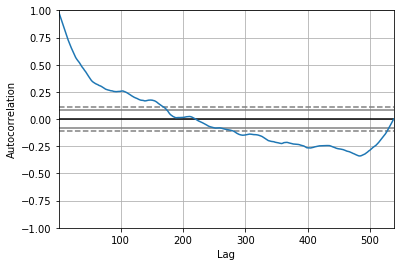

In [10]:
#Auto-correlation plot
autocorrelation_plot(df['Adj Close'])
plt.show()
# In fact we can perform AR(n) with n is up to around 150

Coefficients: [1.68195164 0.95644855]
Test RMSE: 12.205


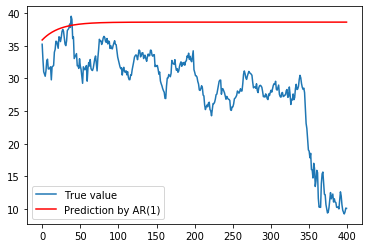

In [22]:
# Perform AR(1)
# split dataset
X = df['Adj Close'].values
train, test = X[1:len(X)-400], X[len(X)-400:]
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test, label = 'True value')
plt.plot(predictions, color='red', label = 'Prediction by AR(1)')
plt.legend ()
plt.show()

In [25]:
#Switch to log return
df['pct_change'] = df['Adj Close'].pct_change()
df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

Coefficients: [-0.0062611  -0.29816485]
Test RMSE: 0.039


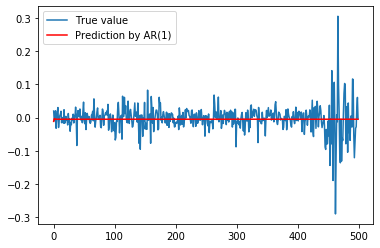

In [28]:
# Perform AR(1)
# split dataset
X = df['log_ret'].values
train, test = X[1:len(X)-500], X[len(X)-500:]
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test, label = 'True value')
plt.plot(predictions, color='red', label = 'Prediction by AR(1)')
plt.legend ()
plt.show()